# Setup

In [1]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.formula.api import ols as sm_ols

In [2]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

output_dir = 'output/'
df_path = output_dir + '/analysis_sample.csv'

## Load in Dataset

In [3]:
df = pd.read_csv(df_path)

In [4]:
df.describe()

,CIK,ret_t-t2,ret_t3-t10,unique_word_count,word_count,bhr_negative,bhr_positive,lm_negative,lm_positive,esg_negative,esg_positive,intl_negative,intl_positive,fs_negative,fs_positive,bio_negative,bio_positive,cg_negative,cg_positive,cs_negative,cs_positive,csat_negative,csat_positive,ecom_negative,ecom_positive,esat_negative,esat_positive,fp_negative,fp_positive,ia_negative,ia_positive,re_negative,re_positive,sc_negative,sc_positive,tech_negative,tech_positive,gvkey,fyear,lpermno,lpermco,sic,sic3,td,long_debt_dum,me,l_a,l_sale,capx_a,div_d,age,atr,smalltaxlosscarry,largetaxlosscarry,gdpdef,l_reala,l_reallongdebt,kz_index,ww_index,hp_index,ww_unconstrain,ww_constrained,kz_unconstrain,kz_constrained,hp_unconstrain,hp_constrained,tnic3tsimm,tnic3hhi,prodmktfluid,delaycon,equitydelaycon,debtdelaycon,privdelaycon,at_raw,raw_Inv,raw_Ch_Cash,raw_Div,raw_Ch_Debt,raw_Ch_Eqty,raw_Ch_WC,raw_CF,l_emp,l_ppent,l_laborratio,Inv,Ch_Cash,Div,Ch_Debt,Ch_Eqty,Ch_WC,CF,td_a,td_mv,mb,prof_a,ppe_a,cash_a,xrd_a,dltt_a,invopps_FG09,sales_g,dv_a,short_debt
count,5.030000e+02,497.000000,497.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,357.000000,357.0,357.000000,357.000000,356.000000,356.000000,357.000000,357.0,3.570000e+02,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,270.000000,270.000000,357.000000,357.000000,357.000000,332.000000,356.000000,357.000000,357.000000,356.000000,357.000000,332.000000,357.000000,357.0,310.000000,310.000000,307.000000,0.0,0.0,0.0,0.0,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,334.000000,356.000000,357.000000,357.000000
mean,7.940509e+05,1.553679,-0.819292,5425.424000,69504.586000,0.038030,0.039918,0.036081,0.014795,0.000827,0.001332,0.000133,0.000338,0.002194,0.001679,0.000019,0.000097,0.000234,0.000075,0.000041,0.000311,9.941721e-07,0.000003,0.000003,0.000017,0.000002,0.000013,0.000562,0.000671,0.000018,0.000051,0.000009,0.000008,0.002397,0.000015,0.000012,0.000047,44766.140056,2021.0,53449.560224,26426.518207,4299.443820,429.721910,14442.586518,1.0,8.980674e+04,9.955584,9.494607,0.031559,0.731092,1.988796,0.212208,0.729630,0.207407,121.693387,5.154168,3.861666,-6.456094,-0.363241,-2.681031,0.806723,0.078652,0.341737,0.234940,0.994398,0.0,3.603145,0.322303,3.210275,NaN,NaN,NaN,NaN,42002.610616,0.066830,-0.008892,0.024412,0.008849,-0.048246,0.016942,0.121747,3.359801,8.120874,4.823368,0.066830,-0.008892,0.024358,0.007794,-0.044476,0.015833,0.121747,0.347411,0.181954,3.546048,0.156999,0.242947,0.131160,0.027923,0.318914,3.212256,0.275366,0.024358,0.093187
std,5.545629e+05,0.723743,0.240770,1177.831997,28943.930805,0.004226,0.005064,0.004679,0.002147,0.000664,0.000576,0.000112,0.000216,0.000818,0.000535,0.000054,0.000190,0.000263,0.000053,0.000038,0.000192,4.073598e-06,0.000010,0.000008,0.000029,0.000007,0.000019,0.000229,0.000283,0.000025,0.000055,0.000014,0.000014,0.000889,0.000022,0.000045,0.000054,60425.049000,0.0,30094.489708,16827.489654,1923.280642,192.361291,24450.507878,0.0,2.297154e+05,1.130886,1.191640,0.026503,0.444014,0.129337,0.179578,0.444976,0.406203,1.621511,1.130779,1.350107,8.457334,0.318860,0.323525,0.395423,0.269573,0.474957,0.424601,0.074743,0.0,8.951600,0.265656,1.715365,NaN,NaN,NaN,NaN,66861.094094,0.083927,0.054218,0.028367,0.084064,0.079466,0.058996,0.086732,1.101770,1.456115,1.325865,0.083927,0.054218,0.028084,0.076615,0.062623,0.047134,0.086732,0.192753,0.146763,2.855027,0.085628,0.210704,0.120123,0.043900,0.

In [5]:
# TODO: explore word count and unique word count

In [6]:
df_longer = df.drop(['CIK','Security','filing_date','ret_t-t2','ret_t3-t10'], axis=1) \
        .melt(id_vars=['Symbol','word_count','unique_word_count'], var_name='sentiment', value_name='score')
df_longer

,Symbol,word_count,unique_word_count,sentiment,score
0,MMM,76433.0,6384.0,truth_path,MMM
1,AOS,33811.0,3801.0,truth_path,AOS
2,ABT,52066.0,5047.0,truth_path,ABT
3,ABBV,61568.0,5890.0,truth_path,ABBV
4,ACN,51961.0,5171.0,truth_path,ACN
...,...,...,...,...,...
50295,BF.B,44204.0,4815.0,short_debt,0.115614
50296,FRC,NaN,NaN,short_debt,NaN
50297,GEHC,NaN,NaN,short_debt,NaN
50298,SBNY,NaN,NaN,short_debt,NaN


In [7]:
# # # correlation matrix
# # corr = df.drop(['CIK','word_count','unique_word_count'], axis=1).corr(numeric_only=True)[['ret_t-t2','ret_t3-t10']]
# # # corr.filter(regex='^[^ret]*')
# # corr
# df

## Results

- [x] Make a table with the correlation of each (10) sentiment measure against both (2) return measures. (So: an 10x2 table.) The return measures are the firm’s returns around the 10-K release. We have 2 versions of this measure because we will try two different windows of time around the 10-K. You will make 5 sentiment measures, and each has a positive and negative component. Thus: 10 sentiment measures. See step 6 for more details about the sentiment and return measures.
- [x] Include a scatterplot (or similar) of each sentiment measure against both return measures.
    - [x] Better: Combining this into a single figure
    - [ ] Better: Skip the correlation table and include the numerical correlations on the figure
    - [ ] Better: Regress (Don’t worry about printing these regressions out “pretty”, just try them if you want!)

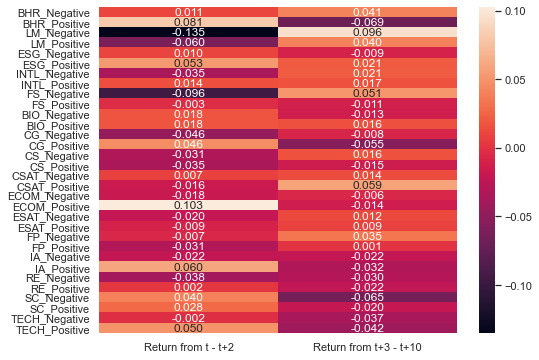

In [39]:
# Correlation matrix
sns.set(rc={"figure.figsize":(8, 6)})
corr = df.filter(regex='^.*_(posi|nega)tive$|^ret_t.*$', axis=1).corr() \
        .filter(regex='^.*_(posi|nega)tive$', axis=0)[['ret_t-t2', 'ret_t3-t10']]
sns.heatmap(corr,
        xticklabels=['Return from t - t+2', 'Return from t+3 - t+10'],    # corr.columns# TODO: change names to be more friendly
        yticklabels=corr.index.map(lambda s: re.sub(r'([a-z]+_[a-z])', lambda x: f'{x[1].upper()}', s)), #.map(lambda x: re.sub('_', ' ', x)),
        annot=True,
        fmt='.03f',);

In [42]:
abs_max_corr = (abs(corr['ret_t-t2']) + abs(corr['ret_t3-t10'])).sort_values(ascending=False)
abs_max_corr.sort_values(ascending=False)

lm_negative      0.230839
bhr_positive     0.149954
fs_negative      0.147233
ecom_positive    0.116484
sc_negative      0.104300
cg_positive      0.101018
lm_positive      0.099928
tech_positive    0.091752
ia_positive      0.091558
csat_positive    0.075066
esg_positive     0.073452
re_negative      0.068117
intl_negative    0.055669
cg_negative      0.054145
bhr_negative     0.051689
cs_positive      0.050093
cs_negative      0.047691
sc_positive      0.047641
ia_negative      0.043404
fp_negative      0.041432
tech_negative    0.038768
bio_positive     0.033847
esat_negative    0.032398
fp_positive      0.031746
intl_positive    0.030927
bio_negative     0.030535
re_positive      0.024516
ecom_negative    0.024213
csat_negative    0.021033
esg_negative     0.019653
esat_positive    0.018249
fs_positive      0.014637
dtype: float64

In [55]:
abs_max_corr_neg = abs_max_corr.filter(regex='.*_negative', axis=0).sort_index().rename(index=lambda x: re.sub('^(.*)_negative$',r'\1',x))
abs_max_corr_pos = abs_max_corr.filter(regex='.*_positive', axis=0).sort_index().rename(index=lambda x: re.sub('^(.*)_positive$',r'\1',x))

(abs_max_corr_pos + abs_max_corr_neg).sort_values(ascending=False)

lm      0.330767
bhr     0.201643
fs      0.161870
cg      0.155163
sc      0.151941
ecom    0.140697
ia      0.134962
tech    0.130520
cs      0.097784
csat    0.096098
esg     0.093104
re      0.092633
intl    0.086596
fp      0.073178
bio     0.064381
esat    0.050647
dtype: float64

In [9]:
# # Scatterplot
# # df_longer = df.drop(['CIK','Security','filing_date','ret_t-t2','ret_t3-t10'], axis=1) \
# #         .melt(id_vars=['Symbol','word_count','unique_word_count'], var_name='sentiment', value_name='score')
# # df_longer

# df.filter(regex='^.*_(posi|nega)tive$|^ret_t.*$', axis=1)

# sns.scatterplot(x=df['ret_t-t2'], y=df['bhr_negative'])

In [10]:
kept_cols = df.filter(regex='^.*_(posi|nega)tive$', axis=1).columns
df_longer_rets = df.filter(regex='^.*_(posi|nega)tive$|^ret_t.*$', axis=1) \
        .melt(id_vars = kept_cols, var_name='Return Type', value_name='Return')

In [11]:
# for col in kept_cols:
#     sns.scatterplot(data=df_longer_rets, x=col, y='Return', hue=col, style='Return Type');

In [12]:
# for col in kept_cols:
#     sns.scatterplot(data=df_longer_rets, x=col, y='Return', style='Return Type');

In [13]:
df.filter(regex='^.*_(posi|nega)tive$|^ret_t.8$', axis=1)

,bhr_negative,bhr_positive,lm_negative,lm_positive,esg_negative,esg_positive,intl_negative,intl_positive,fs_negative,fs_positive,bio_negative,bio_positive,cg_negative,cg_positive,cs_negative,cs_positive,csat_negative,csat_positive,ecom_negative,ecom_positive,esat_negative,esat_positive,fp_negative,fp_positive,ia_negative,ia_positive,re_negative,re_positive,sc_negative,sc_positive,tech_negative,tech_positive
0,0.044313,0.041749,0.043097,0.015124,0.000471,0.001531,0.000105,0.000288,0.001217,0.002342,0.000052,0.000118,0.000222,0.000039,0.000039,0.000105,0.0,0.0,0.000000,0.000000,0.0,0.000013,0.000680,0.000576,0.000026,0.000052,0.000000,0.000000,0.001714,0.000026,0.000000,0.000039
1,0.032918,0.038390,0.034101,0.013161,0.001065,0.001420,0.000089,0.000414,0.002218,0.001893,0.000000,0.000089,0.000296,0.000030,0.000030,0.000237,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000621,0.000503,0.000030,0.000030,0.000000,0.000000,0.002248,0.000000,0.000030,0.000059
2,0.039488,0.039757,0.036242,0.010583,0.000269,0.000903,0.000134,0.000480,0.001633,0.001191,0.000115,0.000365,0.000058,0.000019,0.000058,0.000192,0.0,0.0,0.000000,0.000038,0.0,0.000000,0.000499,0.000346,0.000000,0.000058,0.000058,0.000038,0.001767,0.000038,0.000000,0.000058
3,0.035181,0.034953,0.035814,0.014764,0.000439,0.000975,0.000032,0.000780,0.001234,0.001592,0.000065,0.000276,0.000065,0.000081,0.000016,0.000244,0.0,0.0,0.000000,0.000016,0.0,0.000049,0.000520,0.000780,0.000016,0.000032,0.000016,0.000016,0.001787,0.000000,0.000016,0.000000
4,0.034122,0.046747,0.036431,0.018437,0.000751,0.002194,0.000192,0.000770,0.001463,0.001848,0.000000,0.000058,0.000173,0.000077,0.000096,0.000443,0.0,0.0,0.000019,0.000038,0.0,0.000000,0.000404,0.000866,0.000019,0.000058,0.000000,0.000000,0.002444,0.000038,0.000000,0.000192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,0.036897,0.044091,0.033526,0.017170,0.000679,0.001312,0.000475,0.000769,0.002511,0.003099,0.000068,0.000204,0.000181,0.000068,0.000023,0.000679,0.0,0.0,0.000023,0.000000,0.0,0.000000,0.000475,0.000837,0.000113,0.000204,0.000023,0.000000,0.003212,0.000045,0.000000,0.000045
499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# # Q10
# # ind_retech = retech_tot_grouped.reset_index()

# # # Replace gsectors with their names
# # values = {
# #         15: 'Materials',                 # 15
# #         20: 'Industrials',               # 20
# #         25: 'Consumer Discretionary',    # 25
# #         35: 'Health Care',               # 35
# #         40: 'Financials',                # 40
# #         45: 'Information Technology'}    # 45
# # ind_retech = ind_retech.apply(pd.to_numeric).replace({"gsector": values})

# # Create plot
# g = sns.relplot(data=df_longer_rets, x="Return", y="RETech_avg",
#                 col="gsector", hue="gsector", kind="line",
#                 palette="Spectral", linewidth=4, zorder=6,
#                 col_wrap=2, aspect=1.5, legend=False,
#                 height=4)

# # Create shadow lines
# for time, ax in g.axes_dict.items():
#     ax.text(.1, .85, time, transform=ax.transAxes, weight="bold")
#     sns.lineplot(data=ind_retech, x="fyear", y="RETech_avg",
#                  units="gsector", estimator=None, color= ".7",
#                  linewidth=1, ax=ax)

# ax.set_xticks(ax.get_xticks())
# g.set_titles("")
# g.set_axis_labels("Year", "RETech")
# plt.subplots_adjust(top=0.93)
# plt.suptitle('Average RETech by Year and Sector', size='xx-large', weight='bold')
# plt.savefig('figures/AverageRETechYearSector.png')
# plt.show()

bhr_negative
bhr_positive
lm_negative
lm_positive
esg_negative
esg_positive
intl_negative
intl_positive
fs_negative
fs_positive
bio_negative
bio_positive
cg_negative
cg_positive
cs_negative
cs_positive
csat_negative
csat_positive
ecom_negative
ecom_positive
esat_negative
esat_positive
fp_negative
fp_positive
ia_negative
ia_positive
re_negative
re_positive
sc_negative
sc_positive
tech_negative
tech_positive


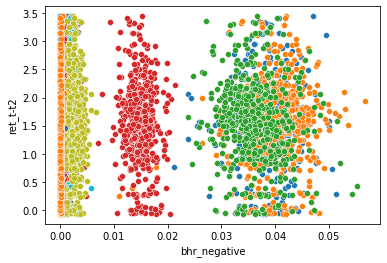

In [15]:
for col in df.filter(regex='^.*_(posi|nega)tive$', axis=1).columns:
    sns.scatterplot(data=df, x=col, y='ret_t-t2')
    print(col)

In [16]:
df.filter(regex='^.*_(posi|nega)tive$', axis=1).quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

,bhr_negative,bhr_positive,lm_negative,lm_positive,esg_negative,esg_positive,intl_negative,intl_positive,fs_negative,fs_positive,bio_negative,bio_positive,cg_negative,cg_positive,cs_negative,cs_positive,csat_negative,csat_positive,ecom_negative,ecom_positive,esat_negative,esat_positive,fp_negative,fp_positive,ia_negative,ia_positive,re_negative,re_positive,sc_negative,sc_positive,tech_negative,tech_positive
0.01,0.025482,0.026364,0.025790,0.009579,0.000193,0.000555,0.000000,0.000012,0.000748,0.000698,0.000000,0.000000,0.000000,0.000000,0.000000,0.000016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000146,0.000134,0.000000,0.000000,0.000000,0.000000,0.000710,0.000000,0.000000,0.000000
0.05,0.031528,0.032880,0.028943,0.011398,0.000273,0.000725,0.000011,0.000070,0.001231,0.000937,0.000000,0.000000,0.000042,0.000013,0.000000,0.000066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000262,0.000282,0.000000,0.000000,0.000000,0.000000,0.001086,0.000000,0.000000,0.000000
0.25,0.035457,0.036979,0.033086,0.013601,0.000435,0.001026,0.000055,0.000177,0.001673,0.001329,0.000000,0.000017,0.000100,0.000039,0.000014,0.000161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000400,0.000483,0.000000,0.000013,0.000000,0.000000,0.001794,0.000000,0.000000,0.000014
0.50,0.038217,0.039824,0.035853,0.014822,0.000568,0.001195,0.000107,0.000308,0.002005,0.001632,0.000000,0.000047,0.000157,0.000065,0.000031,0.000285,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000522,0.000624,0.000013,0.000036,0.000000,0.000000,0.002320,0.000010,0.000000,0.000035
0.75,0.040611,0.043145,0.038983,0.016067,0.000910,0.001456,0.000180,0.000448,0.002499,0.001995,0.000017,0.000107,0.000250,0.000103,0.000059,0.000417,0.000000,0.000000,0.000000,0.000023,0.000000,0.000019,0.000681,0.000833,0.000024,0.000071,0.000015,0.000013,0.002906,0.000021,0.000016,0.000064
0.90,0.042825,0.046023,0.041833,0.017297,0.001856,0.001876,0.000286,0.000623,0.003265,0.002292,0.000044,0.000221,0.000426,0.000139,0.000092,0.000573,0.000000,0.000014,0.000013,0.000045,0.000007,0.000041,0.000879,0.001048,0.000050,0.000117,0.000028,0.000023,0.003573,0.000043,0.000030,0.000103
0.95,0.044350,0.047381,0.043495,0.018019,0.002323,0.002433,0.000329,0.000757,0.003943,0.002492,0.000083,0.000327,0.000778,0.000160,0.000109,0.000656,0.000009,0.000021,0.000020,0.000065,0.000017,0.000053,0.001002,0.001202,0.000067,0.000148,0.000035,0.000035,0.003955,0.000054,0.000047,0.000135
0.99,0.047664,0.051228,0.048285,0.019940,0.003078,0.003557,0.000552,0.000984,0.004949,0.003224,0.000321,0.000901,0.001525,0.000243,0.000169,0.000869,0.000021,0.000056,0.000039,0.000134,0.000039,0.000079,0.001238,0.001503,0.000116,0.000268,0.000061,0.000063,0.004567,0.000090,0.000078,0.000214


,Symbol,ret_t-t2,ret_t3-t10,sentiment,score
0,MMM,-0.017671,-0.090256,bhr_negative,0.044313
1,AOS,-0.014543,-0.138970,bhr_negative,0.032918
2,ABT,-0.041758,-0.127147,bhr_negative,0.039488
3,ABBV,-0.029927,-0.111148,bhr_negative,0.035181
4,ACN,-0.026583,-0.015658,bhr_negative,0.034122
...,...,...,...,...,...
16091,BF.B,NaN,NaN,tech_positive,0.000045
16092,FRC,NaN,NaN,tech_positive,NaN
16093,GEHC,NaN,NaN,tech_positive,NaN
16094,SBNY,NaN,NaN,tech_positive,NaN


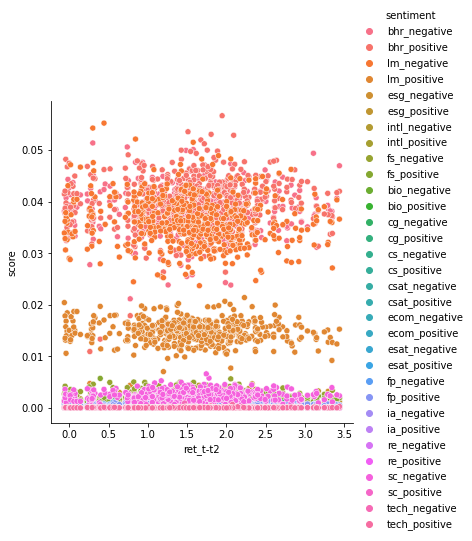

In [17]:
df_longer = df.filter(regex='^.*_(posi|nega)tive$|^ret_t.*$|^Symbol$', axis=1) \
        .melt(id_vars=['Symbol', 'ret_t-t2', 'ret_t3-t10'], var_name='sentiment', value_name='score') #\
        #.sort_values(by=['Symbol'], axis=1)
        # .melt(id_vars=['Symbol','word_count','unique_word_count'], var_name='sentiment', value_name='score')

# df_longer.sort_values(by='Symbol', axis=0)
# sns.scatterplot(df_longer)
sns.relplot(x=df_longer['ret_t-t2'], y=df_longer['score'], hue=df_longer['sentiment'])
df_longer

In [18]:
df_sent_rets = df.filter(regex='^Symbol$|^.*_(posi|nega)tive$|^ret_t.*$', axis=1)
df_sent_rets

,Symbol,ret_t-t2,ret_t3-t10,bhr_negative,bhr_positive,lm_negative,lm_positive,esg_negative,esg_positive,intl_negative,intl_positive,fs_negative,fs_positive,bio_negative,bio_positive,cg_negative,cg_positive,cs_negative,cs_positive,csat_negative,csat_positive,ecom_negative,ecom_positive,esat_negative,esat_positive,fp_negative,fp_positive,ia_negative,ia_positive,re_negative,re_positive,sc_negative,sc_positive,tech_negative,tech_positive
0,MMM,-0.017671,-0.090256,0.044313,0.041749,0.043097,0.015124,0.000471,0.001531,0.000105,0.000288,0.001217,0.002342,0.000052,0.000118,0.000222,0.000039,0.000039,0.000105,0.0,0.0,0.000000,0.000000,0.0,0.000013,0.000680,0.000576,0.000026,0.000052,0.000000,0.000000,0.001714,0.000026,0.000000,0.000039
1,AOS,-0.014543,-0.138970,0.032918,0.038390,0.034101,0.013161,0.001065,0.001420,0.000089,0.000414,0.002218,0.001893,0.000000,0.000089,0.000296,0.000030,0.000030,0.000237,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000621,0.000503,0.000030,0.000030,0.000000,0.000000,0.002248,0.000000,0.000030,0.000059
2,ABT,-0.041758,-0.127147,0.039488,0.039757,0.036242,0.010583,0.000269,0.000903,0.000134,0.000480,0.001633,0.001191,0.000115,0.000365,0.000058,0.000019,0.000058,0.000192,0.0,0.0,0.000000,0.000038,0.0,0.000000,0.000499,0.000346,0.000000,0.000058,0.000058,0.000038,0.001767,0.000038,0.000000,0.000058
3,ABBV,-0.029927,-0.111148,0.035181,0.034953,0.035814,0.014764,0.000439,0.000975,0.000032,0.000780,0.001234,0.001592,0.000065,0.000276,0.000065,0.000081,0.000016,0.000244,0.0,0.0,0.000000,0.000016,0.0,0.000049,0.000520,0.000780,0.000016,0.000032,0.000016,0.000016,0.001787,0.000000,0.000016,0.000000
4,ACN,-0.026583,-0.015658,0.034122,0.046747,0.036431,0.018437,0.000751,0.002194,0.000192,0.000770,0.001463,0.001848,0.000000,0.000058,0.000173,0.000077,0.000096,0.000443,0.0,0.0,0.000019,0.000038,0.0,0.000000,0.000404,0.000866,0.000019,0.000058,0.000000,0.000000,0.002444,0.000038,0.000000,0.000192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,BF.B,NaN,NaN,0.036897,0.044091,0.033526,0.017170,0.000679,0.001312,0.000475,0.000769,0.002511,0.003099,0.000068,0.000204,0.000181,0.000068,0.000023,0.000679,0.0,0.0,0.000023,0.000000,0.0,0.000000,0.000475,0.000837,0.000113,0.000204,0.000023,0.000000,0.003212,0.000045,0.000000,0.000045
499,FRC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500,GEHC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501,SBNY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
pd.wide_to_long(df_sent_rets, stubnames='return', i=['Symbol'], j='age')

,,tech_positive,intl_positive,cg_negative,csat_negative,sc_positive,cs_negative,re_positive,cs_positive,cg_positive,lm_negative,tech_negative,esg_positive,fs_negative,ecom_negative,fp_positive,bio_negative,bhr_positive,ia_negative,re_negative,esat_negative,ret_t-t2,csat_positive,fs_positive,ret_t3-t10,ecom_positive,bio_positive,esat_positive,intl_negative,esg_negative,ia_positive,bhr_negative,fp_negative,lm_positive,sc_negative,return
Symbol,age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [20]:
# pd.wide_to_long(df_sent_rets, stubnames=['a', 'b', 'c', 'd'], i='Symbol', j='huh', sep='_')\
#   .reset_index() #\
#   # .drop('dropme', axis=1)\
#   # .sort_values('id')
df_sent_rets

,Symbol,ret_t-t2,ret_t3-t10,bhr_negative,bhr_positive,lm_negative,lm_positive,esg_negative,esg_positive,intl_negative,intl_positive,fs_negative,fs_positive,bio_negative,bio_positive,cg_negative,cg_positive,cs_negative,cs_positive,csat_negative,csat_positive,ecom_negative,ecom_positive,esat_negative,esat_positive,fp_negative,fp_positive,ia_negative,ia_positive,re_negative,re_positive,sc_negative,sc_positive,tech_negative,tech_positive
0,MMM,-0.017671,-0.090256,0.044313,0.041749,0.043097,0.015124,0.000471,0.001531,0.000105,0.000288,0.001217,0.002342,0.000052,0.000118,0.000222,0.000039,0.000039,0.000105,0.0,0.0,0.000000,0.000000,0.0,0.000013,0.000680,0.000576,0.000026,0.000052,0.000000,0.000000,0.001714,0.000026,0.000000,0.000039
1,AOS,-0.014543,-0.138970,0.032918,0.038390,0.034101,0.013161,0.001065,0.001420,0.000089,0.000414,0.002218,0.001893,0.000000,0.000089,0.000296,0.000030,0.000030,0.000237,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000621,0.000503,0.000030,0.000030,0.000000,0.000000,0.002248,0.000000,0.000030,0.000059
2,ABT,-0.041758,-0.127147,0.039488,0.039757,0.036242,0.010583,0.000269,0.000903,0.000134,0.000480,0.001633,0.001191,0.000115,0.000365,0.000058,0.000019,0.000058,0.000192,0.0,0.0,0.000000,0.000038,0.0,0.000000,0.000499,0.000346,0.000000,0.000058,0.000058,0.000038,0.001767,0.000038,0.000000,0.000058
3,ABBV,-0.029927,-0.111148,0.035181,0.034953,0.035814,0.014764,0.000439,0.000975,0.000032,0.000780,0.001234,0.001592,0.000065,0.000276,0.000065,0.000081,0.000016,0.000244,0.0,0.0,0.000000,0.000016,0.0,0.000049,0.000520,0.000780,0.000016,0.000032,0.000016,0.000016,0.001787,0.000000,0.000016,0.000000
4,ACN,-0.026583,-0.015658,0.034122,0.046747,0.036431,0.018437,0.000751,0.002194,0.000192,0.000770,0.001463,0.001848,0.000000,0.000058,0.000173,0.000077,0.000096,0.000443,0.0,0.0,0.000019,0.000038,0.0,0.000000,0.000404,0.000866,0.000019,0.000058,0.000000,0.000000,0.002444,0.000038,0.000000,0.000192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,BF.B,NaN,NaN,0.036897,0.044091,0.033526,0.017170,0.000679,0.001312,0.000475,0.000769,0.002511,0.003099,0.000068,0.000204,0.000181,0.000068,0.000023,0.000679,0.0,0.0,0.000023,0.000000,0.0,0.000000,0.000475,0.000837,0.000113,0.000204,0.000023,0.000000,0.003212,0.000045,0.000000,0.000045
499,FRC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500,GEHC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501,SBNY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Prepend sentiments by sent-
# prepend returns by ret-
df_sent_rets = df.filter(regex='^Symbol$|^.*_(posi|nega)tive$|^ret_t.*$', axis=1)
df_sent_rets = df_sent_rets.rename(columns=lambda x: re.sub('^(.*_(posi|nega)tive)$',r'score+\1',x))
# df_sent_rets = df_sent_rets.rename(columns=lambda x: re.sub('^(ret_.*)$',r'ret+\1',x))
df_sent_rets

,Symbol,ret_t-t2,ret_t3-t10,score+bhr_negative,score+bhr_positive,score+lm_negative,score+lm_positive,score+esg_negative,score+esg_positive,score+intl_negative,score+intl_positive,score+fs_negative,score+fs_positive,score+bio_negative,score+bio_positive,score+cg_negative,score+cg_positive,score+cs_negative,score+cs_positive,score+csat_negative,score+csat_positive,score+ecom_negative,score+ecom_positive,score+esat_negative,score+esat_positive,score+fp_negative,score+fp_positive,score+ia_negative,score+ia_positive,score+re_negative,score+re_positive,score+sc_negative,score+sc_positive,score+tech_negative,score+tech_positive
0,MMM,-0.017671,-0.090256,0.044313,0.041749,0.043097,0.015124,0.000471,0.001531,0.000105,0.000288,0.001217,0.002342,0.000052,0.000118,0.000222,0.000039,0.000039,0.000105,0.0,0.0,0.000000,0.000000,0.0,0.000013,0.000680,0.000576,0.000026,0.000052,0.000000,0.000000,0.001714,0.000026,0.000000,0.000039
1,AOS,-0.014543,-0.138970,0.032918,0.038390,0.034101,0.013161,0.001065,0.001420,0.000089,0.000414,0.002218,0.001893,0.000000,0.000089,0.000296,0.000030,0.000030,0.000237,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000621,0.000503,0.000030,0.000030,0.000000,0.000000,0.002248,0.000000,0.000030,0.000059
2,ABT,-0.041758,-0.127147,0.039488,0.039757,0.036242,0.010583,0.000269,0.000903,0.000134,0.000480,0.001633,0.001191,0.000115,0.000365,0.000058,0.000019,0.000058,0.000192,0.0,0.0,0.000000,0.000038,0.0,0.000000,0.000499,0.000346,0.000000,0.000058,0.000058,0.000038,0.001767,0.000038,0.000000,0.000058
3,ABBV,-0.029927,-0.111148,0.035181,0.034953,0.035814,0.014764,0.000439,0.000975,0.000032,0.000780,0.001234,0.001592,0.000065,0.000276,0.000065,0.000081,0.000016,0.000244,0.0,0.0,0.000000,0.000016,0.0,0.000049,0.000520,0.000780,0.000016,0.000032,0.000016,0.000016,0.001787,0.000000,0.000016,0.000000
4,ACN,-0.026583,-0.015658,0.034122,0.046747,0.036431,0.018437,0.000751,0.002194,0.000192,0.000770,0.001463,0.001848,0.000000,0.000058,0.000173,0.000077,0.000096,0.000443,0.0,0.0,0.000019,0.000038,0.0,0.000000,0.000404,0.000866,0.000019,0.000058,0.000000,0.000000,0.002444,0.000038,0.000000,0.000192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,BF.B,NaN,NaN,0.036897,0.044091,0.033526,0.017170,0.000679,0.001312,0.000475,0.000769,0.002511,0.003099,0.000068,0.000204,0.000181,0.000068,0.000023,0.000679,0.0,0.0,0.000023,0.000000,0.0,0.000000,0.000475,0.000837,0.000113,0.000204,0.000023,0.000000,0.003212,0.000045,0.000000,0.000045
499,FRC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500,GEHC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501,SBNY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# pd.wide_to_long(df_sent_rets, stubnames=['ret','sent'], i='Symbol', j='type', sep='+', suffix='.+')
# # pd.wide_to_long(df_sent_rets, stubnames=['sentiment','return'], i='Symbol', j='new', sep='-')

In [23]:
# stubnames=['score','ret']
df_sent_rets_longer = pd.wide_to_long(df_sent_rets, stubnames=['score'], i='Symbol', j='sentiment', sep='+', suffix='.+').reset_index()
df_sent_rets_longer

,Symbol,sentiment,ret_t-t2,ret_t3-t10,score
0,MMM,bhr_negative,-0.017671,-0.090256,0.044313
1,AOS,bhr_negative,-0.014543,-0.138970,0.032918
2,ABT,bhr_negative,-0.041758,-0.127147,0.039488
3,ABBV,bhr_negative,-0.029927,-0.111148,0.035181
4,ACN,bhr_negative,-0.026583,-0.015658,0.034122
...,...,...,...,...,...
16091,BF.B,tech_positive,NaN,NaN,0.000045
16092,FRC,tech_positive,NaN,NaN,NaN
16093,GEHC,tech_positive,NaN,NaN,NaN
16094,SBNY,tech_positive,NaN,NaN,NaN


In [24]:
df_sent_rets_longer2 = df_sent_rets_longer.melt(id_vars=['Symbol', 'sentiment','score'], value_vars=['ret_t-t2', 'ret_t3-t10'],var_name='return type', value_name='return')
df_sent_rets_longer2

,Symbol,sentiment,score,return type,return
0,MMM,bhr_negative,0.044313,ret_t-t2,-0.017671
1,AOS,bhr_negative,0.032918,ret_t-t2,-0.014543
2,ABT,bhr_negative,0.039488,ret_t-t2,-0.041758
3,ABBV,bhr_negative,0.035181,ret_t-t2,-0.029927
4,ACN,bhr_negative,0.034122,ret_t-t2,-0.026583
...,...,...,...,...,...
32187,BF.B,tech_positive,0.000045,ret_t3-t10,NaN
32188,FRC,tech_positive,NaN,ret_t3-t10,NaN
32189,GEHC,tech_positive,NaN,ret_t3-t10,NaN
32190,SBNY,tech_positive,NaN,ret_t3-t10,NaN


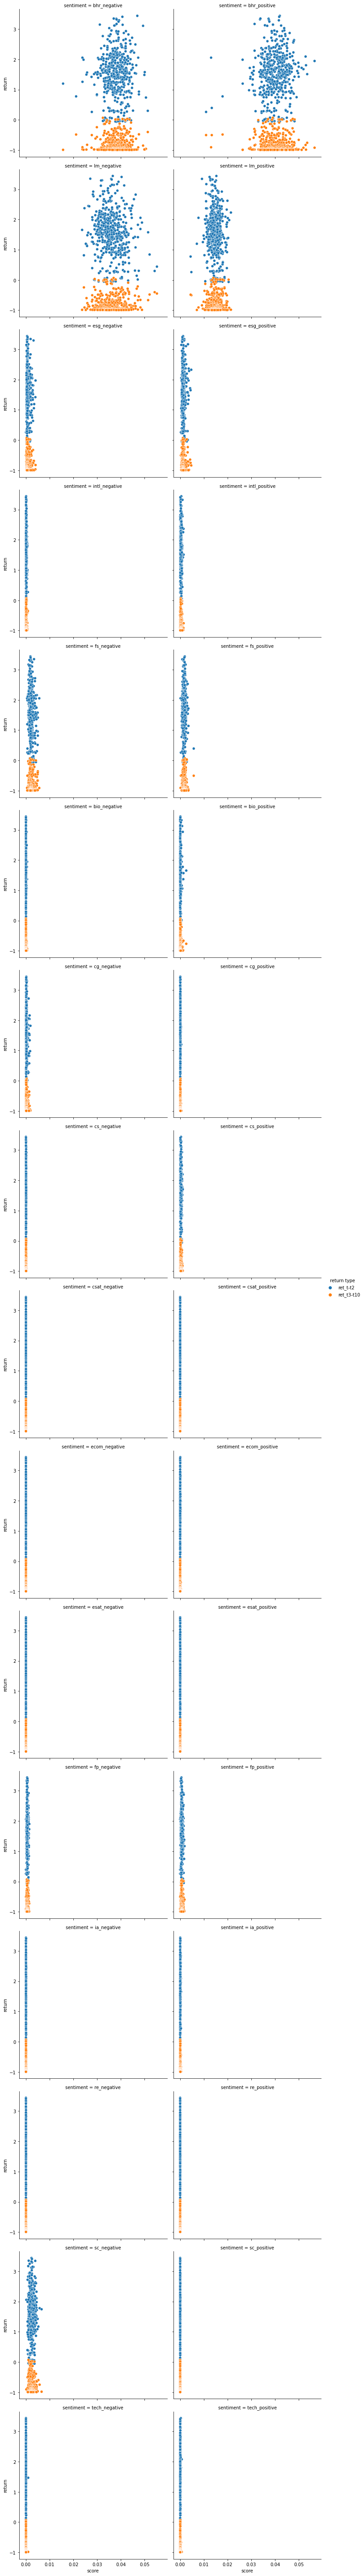

In [25]:
# almost there, let x axis adjust
sns.relplot(data=df_sent_rets_longer2, x='score', y='return', hue='return type', col_wrap=2, col='sentiment')
# plt.xscale('function', functions=(lambda x: np.log(x + 1), lambda x: np.exp(x) - 1))
plt.show()

<AxesSubplot:xlabel='score', ylabel='return'>

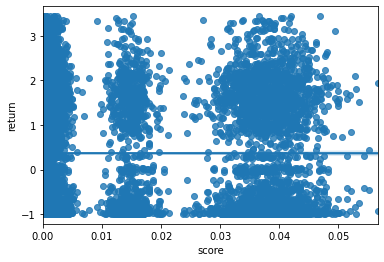

In [26]:
sns.regplot(data=df_sent_rets_longer2, x='score', y='return')

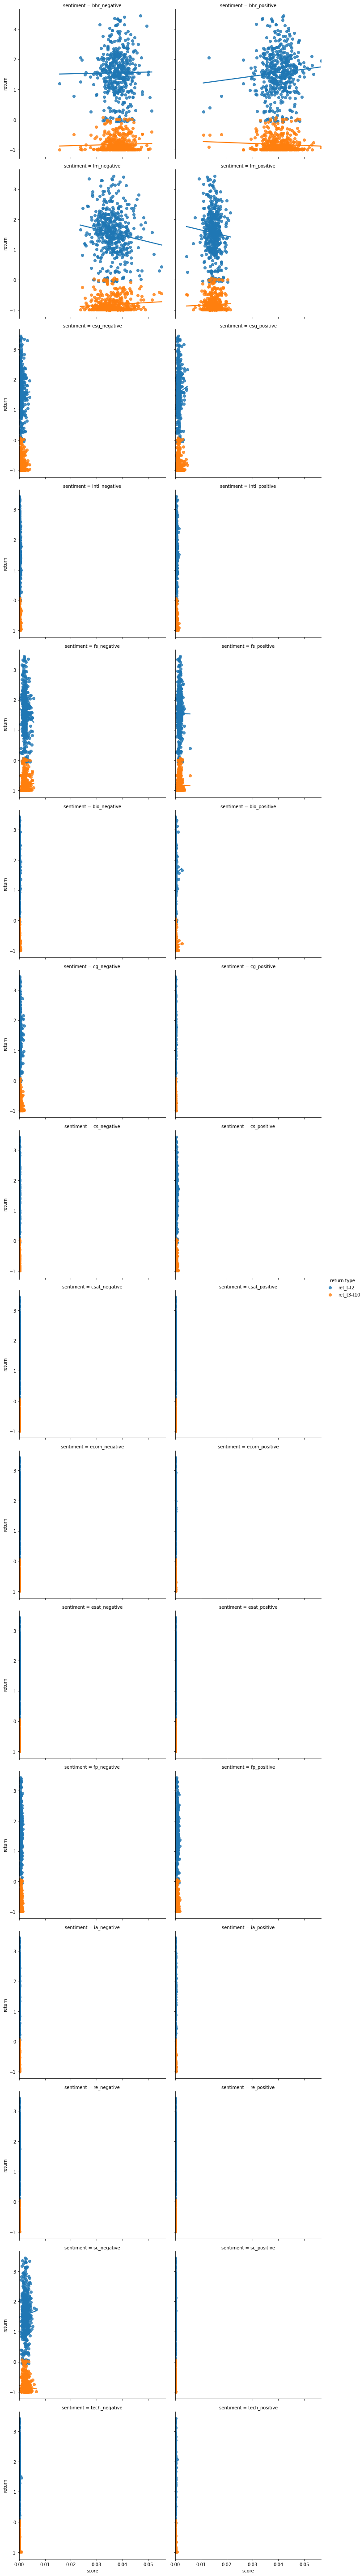

In [27]:
sns.lmplot(data=df_sent_rets_longer2, x='score', y='return', hue='return type', col_wrap=2, col='sentiment', ci=None)

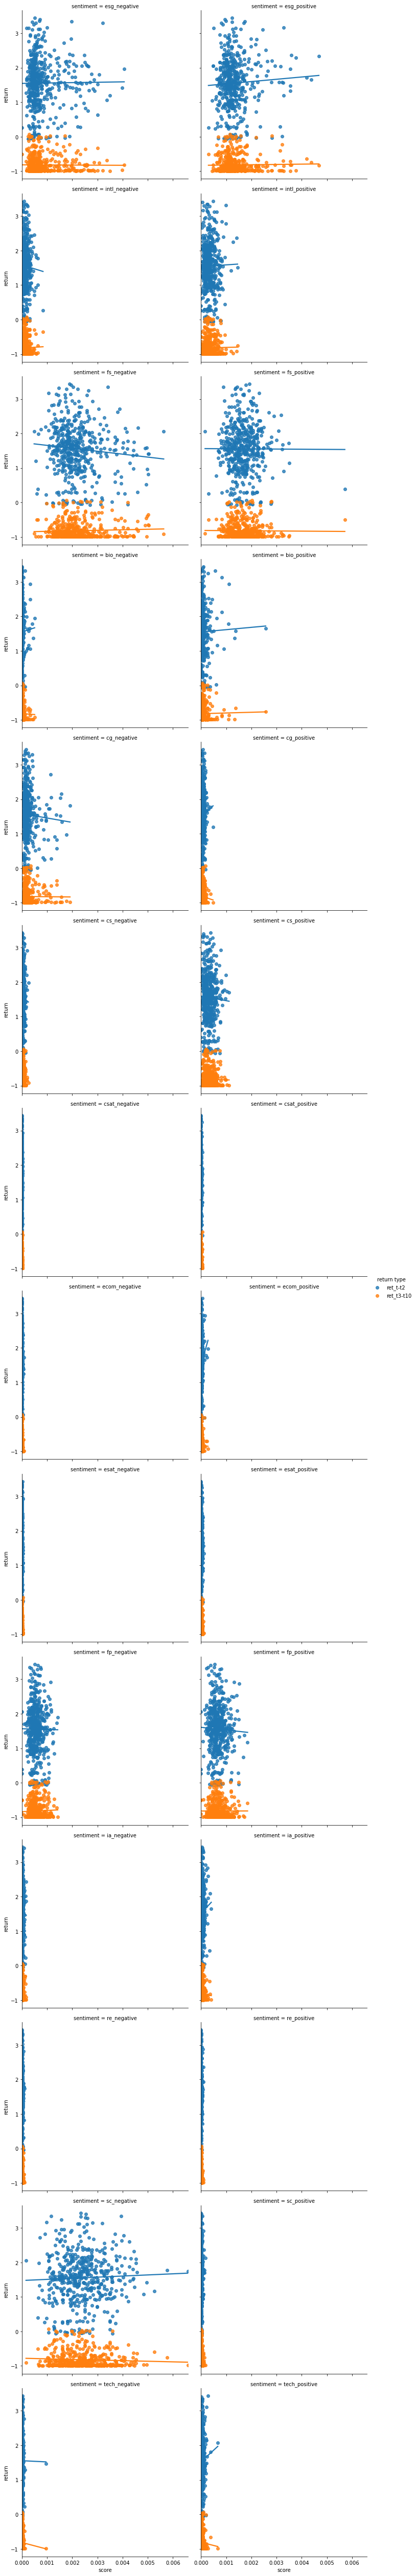

In [28]:
sns.lmplot(
        data=df_sent_rets_longer2.query('~sentiment.isin(["bhr_positive","bhr_negative","lm_positive","lm_negative"])'),
        x='score',
        y='return',
        hue='return type',
        col_wrap=2,
        col='sentiment',
        ci=None)

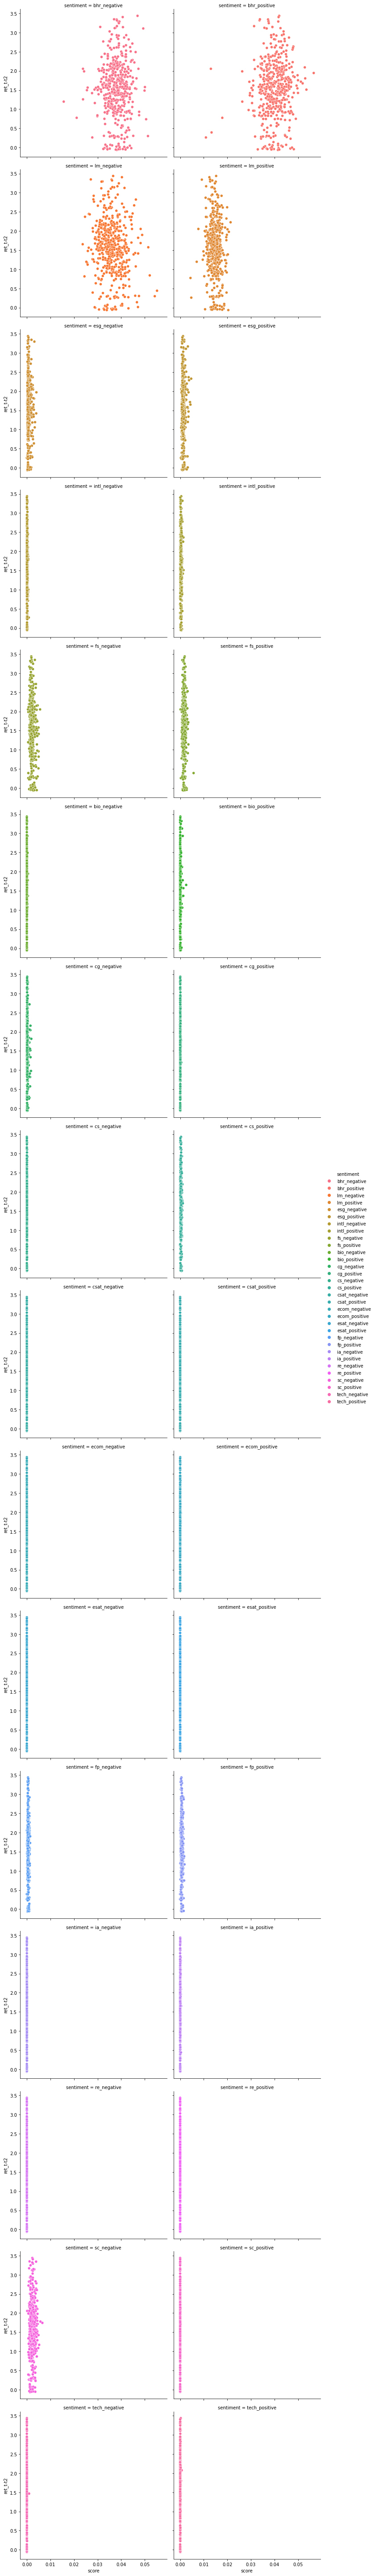

In [29]:
sns.relplot(data=df_sent_rets_longer, x='score', y='ret_t-t2', col='sentiment', hue='sentiment', col_wrap=2)
# sns.relplot(data=df_sent_rets_longer, x='score', y='ret_t3-t10', hue='sentiment')

## Linear Regression

In [30]:
# df.filter(regex='^.*_(posi|nega)tive$|^ret_t-t2$', axis=0)
df_ret2 = df.filter(regex='^.*_(posi|nega)tive$|^ret_t-t2$', axis=1)
df_ret2

,ret_t-t2,bhr_negative,bhr_positive,lm_negative,lm_positive,esg_negative,esg_positive,intl_negative,intl_positive,fs_negative,fs_positive,bio_negative,bio_positive,cg_negative,cg_positive,cs_negative,cs_positive,csat_negative,csat_positive,ecom_negative,ecom_positive,esat_negative,esat_positive,fp_negative,fp_positive,ia_negative,ia_positive,re_negative,re_positive,sc_negative,sc_positive,tech_negative,tech_positive
0,-0.017671,0.044313,0.041749,0.043097,0.015124,0.000471,0.001531,0.000105,0.000288,0.001217,0.002342,0.000052,0.000118,0.000222,0.000039,0.000039,0.000105,0.0,0.0,0.000000,0.000000,0.0,0.000013,0.000680,0.000576,0.000026,0.000052,0.000000,0.000000,0.001714,0.000026,0.000000,0.000039
1,-0.014543,0.032918,0.038390,0.034101,0.013161,0.001065,0.001420,0.000089,0.000414,0.002218,0.001893,0.000000,0.000089,0.000296,0.000030,0.000030,0.000237,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000621,0.000503,0.000030,0.000030,0.000000,0.000000,0.002248,0.000000,0.000030,0.000059
2,-0.041758,0.039488,0.039757,0.036242,0.010583,0.000269,0.000903,0.000134,0.000480,0.001633,0.001191,0.000115,0.000365,0.000058,0.000019,0.000058,0.000192,0.0,0.0,0.000000,0.000038,0.0,0.000000,0.000499,0.000346,0.000000,0.000058,0.000058,0.000038,0.001767,0.000038,0.000000,0.000058
3,-0.029927,0.035181,0.034953,0.035814,0.014764,0.000439,0.000975,0.000032,0.000780,0.001234,0.001592,0.000065,0.000276,0.000065,0.000081,0.000016,0.000244,0.0,0.0,0.000000,0.000016,0.0,0.000049,0.000520,0.000780,0.000016,0.000032,0.000016,0.000016,0.001787,0.000000,0.000016,0.000000
4,-0.026583,0.034122,0.046747,0.036431,0.018437,0.000751,0.002194,0.000192,0.000770,0.001463,0.001848,0.000000,0.000058,0.000173,0.000077,0.000096,0.000443,0.0,0.0,0.000019,0.000038,0.0,0.000000,0.000404,0.000866,0.000019,0.000058,0.000000,0.000000,0.002444,0.000038,0.000000,0.000192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,NaN,0.036897,0.044091,0.033526,0.017170,0.000679,0.001312,0.000475,0.000769,0.002511,0.003099,0.000068,0.000204,0.000181,0.000068,0.000023,0.000679,0.0,0.0,0.000023,0.000000,0.0,0.000000,0.000475,0.000837,0.000113,0.000204,0.000023,0.000000,0.003212,0.000045,0.000000,0.000045
499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Normalize
df_ret2 = (df_ret2-df_ret2.min())/(df_ret2.max()-df_ret2.min()) # Min-Max Scaling
df_ret2 = (df_ret2-df_ret2.mean())/df_ret2.std() # Mean normalization
df_ret2['ret_t-t2'] = df['ret_t-t2']
df_ret2.describe()

,ret_t-t2,bhr_negative,bhr_positive,lm_negative,lm_positive,esg_negative,esg_positive,intl_negative,intl_positive,fs_negative,fs_positive,bio_negative,bio_positive,cg_negative,cg_positive,cs_negative,cs_positive,csat_negative,csat_positive,ecom_negative,ecom_positive,esat_negative,esat_positive,fp_negative,fp_positive,ia_negative,ia_positive,re_negative,re_positive,sc_negative,sc_positive,tech_negative,tech_positive
count,497.000000,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,500.000000,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,1.553679,1.509903e-16,-2.167155e-16,-2.735590e-16,-6.465939e-16,7.815970e-17,0.000000,4.440892e-17,-3.730349e-17,2.238210e-16,3.197442e-17,-5.329071e-18,-8.526513e-17,2.842171e-17,-7.105427e-18,-3.375078e-17,-1.421085e-17,3.552714e-18,3.552714e-17,2.131628e-17,-1.421085e-16,-5.595524e-17,-4.973799e-17,1.936229e-16,4.884981e-16,-7.105427e-18,-2.664535e-18,-3.552714e-17,8.348877e-17,1.900702e-16,-1.065814e-17,-3.552714e-18,-3.197442e-17
std,0.723743,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-0.063537,-5.294160e+00,-5.724031e+00,-2.647400e+00,-4.845196e+00,-1.245562e+00,-1.800367,-1.186541e+00,-1.569120e+00,-2.091485e+00,-2.839584e+00,-3.551995e-01,-5.136629e-01,-8.896929e-01,-1.428090e+00,-1.075210e+00,-1.618621e+00,-2.440526e-01,-3.433927e-01,-3.442872e-01,-5.709913e-01,-3.019062e-01,-6.693117e-01,-2.452896e+00,-2.371348e+00,-7.175591e-01,-9.231667e-01,-6.068339e-01,-5.358327e-01,-2.514819e+00,-6.857613e-01,-2.578817e-01,-8.654935e-01
25%,1.123559,-6.088796e-01,-5.802477e-01,-6.399981e-01,-5.562429e-01,-5.905713e-01,-0.531841,-6.956333e-01,-7.464163e-01,-6.370301e-01,-6.559774e-01,-3.551995e-01,-4.222091e-01,-5.090755e-01,-6.813193e-01,-7.005823e-01,-7.815387e-01,-2.440526e-01,-3.433927e-01,-3.442872e-01,-5.709913e-01,-3.019062e-01,-6.693117e-01,-7.051298e-01,-6.641062e-01,-7.175591e-01,-6.957267e-01,-6.068339e-01,-5.358327e-01,-6.778691e-01,-6.857613e-01,-2.578817e-01,-6.011902e-01
50%,1.566443,4.419069e-02,-1.860649e-02,-4.866671e-02,1.229223e-02,-3.901572e-01,-0.237569,-2.354937e-01,-1.423085e-01,-2.313285e-01,-8.884870e-02,-3.551995e-01,-2.666071e-01,-2.946672e-01,-2.047147e-01,-2.455982e-01,-1.364372e-01,-2.440526e-01,-3.433927e-01,-3.442872e-01,-5.709913e-01,-3.019062e-01,-6.693117e-01,-1.729562e-01,-1.668523e-01,-2.198581e-01,-2.730507e-01,-6.068339e-01,-5.358327e-01,-8.656721e-02,-2.539259e-01,-2.578817e-01,-2.267088e-01
75%,2.020369,6.108224e-01,6.372480e-01,6.202304e-01,5.924939e-01,1.247818e-01,0.214730,4.127268e-01,5.099049e-01,3.718663e-01,5.909832e-01,-4.780731e-02,5.098141e-02,6.090492e-02,5.287929e-01,4.816073e-01,5.518420e-01,-2.440526e-01,-3.433927e-01,-3.442872e-01,2.297459e-01,-3.019062e-01,3.581532e-01,5.179605e-01,5.711349e-01,2.359591e-01,3.596212e-01,4.236691e-01,3.850034e-01,5.723991e-01,2.630724e-01,9.569007e-02,3.247410e-01
max,3.438352,3.158309e+00,3.306434e+00,4.092256e+00,3.074294e+00,4.874702e+00,5.819405,6.257336e+00,5.167758e+00,4.200719e+00,7.545574e+00,8.956019e+00,1.303960e+01,6.369355e+00,7.654175e+00,5.669492e+00,4.191740e+00,7.158047e+00,6.128287e+00,8.743582e+00,9.002496e+00,6.234268e+00,5.589885e+00,3.747763e+00,4.168301e+00,6.055306e+00,6.467981e+00,6.887748e+00,6.170784e+00,4.729480e+00,6.818850e+00,2.072238e+01,1.146451e+01


In [32]:
sm_ols('Q("ret_t-t2") ~ bhr_negative + bhr_positive + lm_negative + lm_positive + esg_negative + esg_positive + intl_negative + intl_positive + fs_negative + fs_positive', data=df_ret2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Q("ret_t-t2")   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     2.388
Date:                Fri, 24 Mar 2023   Prob (F-statistic):            0.00905
Time:                        08:33:40   Log-Likelihood:                -532.10
No. Observations:                 497   AIC:                             1086.
Df Residuals:                     486   BIC:                             1133.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.5532      0.032     48.505      0.000       1.490       1.616
bhr_negative      0.0647      0.041      1.590      0.113      -0.015       0.145
bhr_positive      0.0784      0.039      2.034      0.043       0.003       0.154
lm_negative      -0.1123      0.037     -3.022      0.003      -0.185      -0.039
lm_positive      -0.0706      0.036     -1.961      0.050      -0.141       0.000
esg_negative      0.0212      0.042      0.501      0.616      -0.062       0.104
esg_positive      0.0294      0.037      0.798      0.425      -0.043       0.102
intl_negative    -0.0205      0.035     -0.580      0.562      -0.090       0.049
intl_positive     0.0281      0.037      0.766      0.444      -0.044       0.100
fs_negative      -0.0460      0.037     -1.237      0.217      -0.119       0.027
fs_positive      -0.0373      0.037     -1.017      0.310      -0.109       0.035
==============================================================================
Omnibus:                        1.287   Durbin-Watson:                   0.122
Prob(Omnibus):                  0.525   Jarque-Bera (JB):                1.082
Skew:                          -0.083   Prob(JB):                        0.582
Kurtosis:                       3.158   Cond. No.                         2.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
df_full_reg = (df-df.min(numeric_only=True))/(df.max(numeric_only=True)-df.min(numeric_only=True)) # Min-Max Scaling
df_full_reg = (df_full_reg-df_full_reg.mean(numeric_only=True))/df_full_reg.std(numeric_only=True) # Mean normalization
df_full_reg['ret_t-t2'] = df['ret_t-t2']
df_full_reg.describe()

,CF,CIK,Ch_Cash,Ch_Debt,Ch_Eqty,Ch_WC,Div,Inv,age,at_raw,atr,bhr_negative,bhr_positive,bio_negative,bio_positive,capx_a,cash_a,cg_negative,cg_positive,cs_negative,cs_positive,csat_negative,csat_positive,debtdelaycon,delaycon,div_d,dltt_a,dv_a,ecom_negative,ecom_positive,equitydelaycon,esat_negative,esat_positive,esg_negative,esg_positive,fp_negative,fp_positive,fs_negative,fs_positive,fyear,gdpdef,gvkey,hp_constrained,hp_index,hp_unconstrain,ia_negative,ia_positive,intl_negative,intl_positive,invopps_FG09,kz_constrained,kz_index,kz_unconstrain,l_a,l_emp,l_laborratio,l_ppent,l_reala,l_reallongdebt,l_sale,largetaxlosscarry,lm_negative,lm_positive,long_debt_dum,lpermco,lpermno,mb,me,ppe_a,privdelaycon,prodmktfluid,prof_a,raw_CF,raw_Ch_Cash,raw_Ch_Debt,raw_Ch_Eqty,raw_Ch_WC,raw_Div,raw_Inv,re_negative,re_positive,ret_t-t2,ret_t3-t10,sales_g,sc_negative,sc_positive,short_debt,sic,sic3,smalltaxlosscarry,td,td_a,td_mv,tech_negative,tech_positive,tnic3hhi,tnic3tsimm,unique_word_count,word_count,ww_constrained,ww_index,ww_unconstrain,xrd_a
count,3.570000e+02,5.030000e+02,3.570000e+02,3.570000e+02,3.570000e+02,3.570000e+02,3.570000e+02,3.570000e+02,3.570000e+02,357.000000,3.570000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,3.570000e+02,3.570000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,0.0,0.0,3.570000e+02,3.570000e+02,3.570000e+02,5.000000e+02,5.000000e+02,0.0,5.000000e+02,5.000000e+02,5.000000e+02,500.000000,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,0.0,3.570000e+02,3.570000e+02,0.0,3.570000e+02,3.570000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,3.340000e+02,3.320000e+02,3.320000e+02,3.570000e+02,3.570000e+02,3.570000e+02,3.570000e+02,3.570000e+02,3.570000e+02,3.570000e+02,3.570000e+02,2.700000e+02,5.000000e+02,5.000000e+02,0.0,3.570000e+02,3.570000e+02,3.570000e+02,3.570000e+02,3.570000e+02,0.0,3.070000e+02,3.570000e+02,3.570000e+02,3.570000e+02,3.570000e+02,3.570000e+02,3.570000e+02,3.570000e+02,3.570000e+02,5.000000e+02,5.000000e+02,497.000000,497.000000,3.560000e+02,5.000000e+02,5.000000e+02,3.570000e+02,3.560000e+02,3.560000e+02,2.700000e+02,3.570000e+02,3.570000e+02,3.570000e+02,5.000000e+02,5.000000e+02,3.100000e+02,3.100000e+02,5.000000e+02,5.000000e+02,3.560000e+02,3.560000e+02,3.570000e+02,3.570000e+02
mean,1.311121e-15,2.825220e-17,-4.577726e-16,1.243947e-16,-1.069795e-16,1.492737e-16,9.951579e-18,-4.677242e-16,-3.159626e-16,0.000000,-1.393221e-16,1.509903e-16,-2.167155e-16,-5.329071e-18,-8.526513e-17,-2.487895e-17,-1.393221e-16,2.842171e-17,-7.105427e-18,-3.375078e-17,-1.421085e-17,3.552714e-18,3.552714e-17,NaN,NaN,4.727000e-17,-1.890800e-16,5.224579e-17,2.131628e-17,-1.421085e-16,NaN,-5.595524e-17,-4.973799e-17,7.815970e-17,0.000000,1.936229e-16,4.884981e-16,2.238210e-16,3.197442e-17,NaN,-4.478211e-17,-5.348974e-17,NaN,-7.712474e-17,-2.662047e-16,-7.105427e-18,-2.664535e-18,4.440892e-17,-3.730349e-17,6.913964e-17,-5.617996e-17,1.029966e-15,-3.980632e-17,3.234263e-17,2.599850e-16,3.483053e-17,1.057355e-16,-2.239105e-17,-4.975789e-17,-1.020037e-16,9.210739e-17,-2.735590e-16,-6.465939e-16,NaN,-3.047671e-16,-1.020037e-16,4.478211e-17,5.722158e-17,4.478211e-17,NaN,-1.157236e-17,3.184505e-16,1.311121e-15,-4.577726e-16,-1.492737e-16,-2.861079e-16,4.975789e-17,-1.268826e-16,-4.677242e-16,-3.552714e-17,8.348877e-17,1.553679,0.000000,-2.993860e-17,1.900702e-16,-1.065814e-17,1.044916e-16,1.596725e-16,1.946009e-16,9.868649e-18,9.951579e-17,-9.702789e-17,-1.057355e-16,-3.552714e-18,-3.197442e-17,-8.595275e-18,-8.595275e-18,4.440892e-17,1.465494e-16,-2.993860e-17,4.490790e-17,-8.458842e-17,-3.856237e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.00

In [34]:
all_non_ret_cols = "+".join(df_full_reg.columns.difference(['ret_t-t2', 'ret_t3-t10']).map(lambda s: re.sub('^(.*)$', r'Q("\1")', s)))
# sm_ols('Q("ret_t-t2") ~ ' + '+'.join(df_full_reg.columns.difference(['ret_t-t2', 'ret_t3-t10'])), data=df_full_reg).fit().summary()
sm_ols('Q("ret_t-t2") ~ ' + all_non_ret_cols, data=df_full_reg.dropna()).fit().summary()

ValueError: negative dimensions are not allowed

In [ ]:

corr2 = df_full_reg.corr(numeric_only=True)
print(corr2.abs().replace(corr2.max(),corr2.min()).idxmax()) # most associated
print(corr2['CF'])
corr2
# sns.heatmap(corr2,
#         xticklabels=corr2.columns,    # corr.columns# TODO: change names to be more friendly
#         yticklabels=corr2.index, #.map(lambda x: re.sub('_', ' ', x)),
#         annot=True,
#         fmt='.03f');

In [ ]:
# print(corr2.abs().replace(corr2.max(),corr2.min()).idxmax().filter(regex='^ret_.*$')) # most associated
corr2.abs()['ret_t-t2'].sort_values(ascending=False)[2:12] # top 10 excluding
# corr2[['ret_t-t2','ret_t3-t10']]

In [ ]:
corr2.abs()['ret_t3-t10'].sort_values(ascending=False)[2:12] # top 10 excluding

Four discussion topics:

- On (1), (2), and (3) below: Focus just on the first return variable (which will examine returns around the 10-K publication)

- On (4) below: Focus on how the “ML sentiment” variables (positive and negative) are related to the two different return measures.

1. [x] Compare / contrast the relationship between the returns variable and the two “LM Sentiment” variables (positive and negative) with the relationship between the returns variable and the two “ML Sentiment” variables (positive and negative). Focus on the patterns of the signs of the relationships and the magnitudes.

1. [x] If your comparison/contrast conflicts with Table 3 of the Garcia, Hu, and Rohrer paper (ML_JFE.pdf, in the repo), discuss and brainstorm possible reasons why you think the results may differ. If your patterns agree, discuss why you think they bothered to include so many more firms and years and additional controls in their study? (It was more work than we did on this midterm, so why do it to get to the same point?)

1. [ ] Discuss your 3 “contextual” sentiment measures. Do they have a relationship with returns that looks “different enough” from zero to investigate further? If so, make an economic argument for why sentiment in that context can be value relevant.

1. [ ] Is there a difference in the sign and magnitude? Speculate on why or why not.

In [ ]:
# Relationship between ret_t-t2 and LMs, ret_t-t2 and MLs

df_sent_rets2 = df[['ret_t-t2','bhr_negative','bhr_positive','lm_negative','lm_positive']]

# # Scale to unit variance for comparison with MLE not actually necessary
# df_sent_rets2 = (df_sent_rets2-df_sent_rets2.mean())/df_sent_rets2.std() # Mean normalization
# df_sent_rets2['ret_t-t2'] = df['ret_t-t2']

df_sent_rets2.corr()[['ret_t-t2']]
# both ML are positive, both LM are negative, both positive are more positively correlated than the negative correlations, LM negative and LM positive have stronger relationship

In [ ]:
# S&P500 isn't representative of all firms
# lm positive and lm negative are really similar for 1 filing period excess return
# lm psositivei really similar fofr 5 and 6 filing perdio excess return
# lm negative changes for them, what is mine?
# ml positive matches sign and approximate direction for 1filing period excess return
# ml negative wrong sign and suprisingly very high magnitude compared to theirs
# theirs are also value weighted thouugh
# ours are not
# I can try
# but no actual value included in any of our tables
# Theirs is way more work for a lot of good reasons
# Exclude stock price on day before call of $3 or less, 60 days of trading required before and after filing date, 180+ required between filings, only 1 10-K per year per firm -> 76,922 observations
# Aso include earnings calls and wall street journal for many years (See table 1)
# aka only firms we should care about, only firms that people would react to theoretically, only those that have some bearing

In [ ]:
# so far fs_negative is in top 10 factors for ret_t-t2
# exploring more with bigger dict

In [ ]:
# difference in sign and magnitude absolutely
# but magnitude tends to be more important
# we care when the values have a greater impact on the actual
# after normalizing, higher magnitudes are more interesting...